# Carrefour Hackathon III
**Goal:** Predicting the category of a product. There exists a main category that is then split into sublevels.
The level we'll focus on in this project is the third one.

*Authors:* Vanessa Chahawane, Ashraf Ghyie, Karim Siala, Mohamed Ali Jebali, Rania Ferchichi 

---

This is the second notebook needed for this project. Here we view the images stored on the cloud. Then, depending on which images we're going to keep, e.g, only the front views, we will dump them on the VM so we can acces them for training.

*NB: We provide a total of 3 notebooks; one for metadata exploration, one for creating a training set, and finally, one for the model and it's evaluation. Please refer to each notebook for the part you wish to see for this project.*

---

In [15]:
from google.cloud import bigquery, storage
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

To keep this notebook as clean and simple as possible, some functions needed for data retrieval, cleaning, mapping and visualisation are in a seperate python script that we load here.

In [2]:
# loading all functions needed for retrieving data, cleaning, mapping ..
from util import *

### Getting the metadata

This is needed to get the filenames of the images that we need to retrieve from the cloud.

In [3]:
bq_client = bigquery.Client(location="EU", project="hackathon-2021-305208")

Because the most of the views seem to be from a front angle, and since most of the products have one or two views (refer to the firts notebook), we will only deal with the angles with ids **1, 11 and 31.**

In [4]:
# get the frontal views
df = querry_data(bq_client)
df.shape

(41315, 19)

### Accessing the cloud storage

In [5]:
cs_client = storage.Client(project='hackathon-2021-305208')
bucket = cs_client.get_bucket("hackathon-2021-images")

In [6]:
sns.set_theme(style="white")

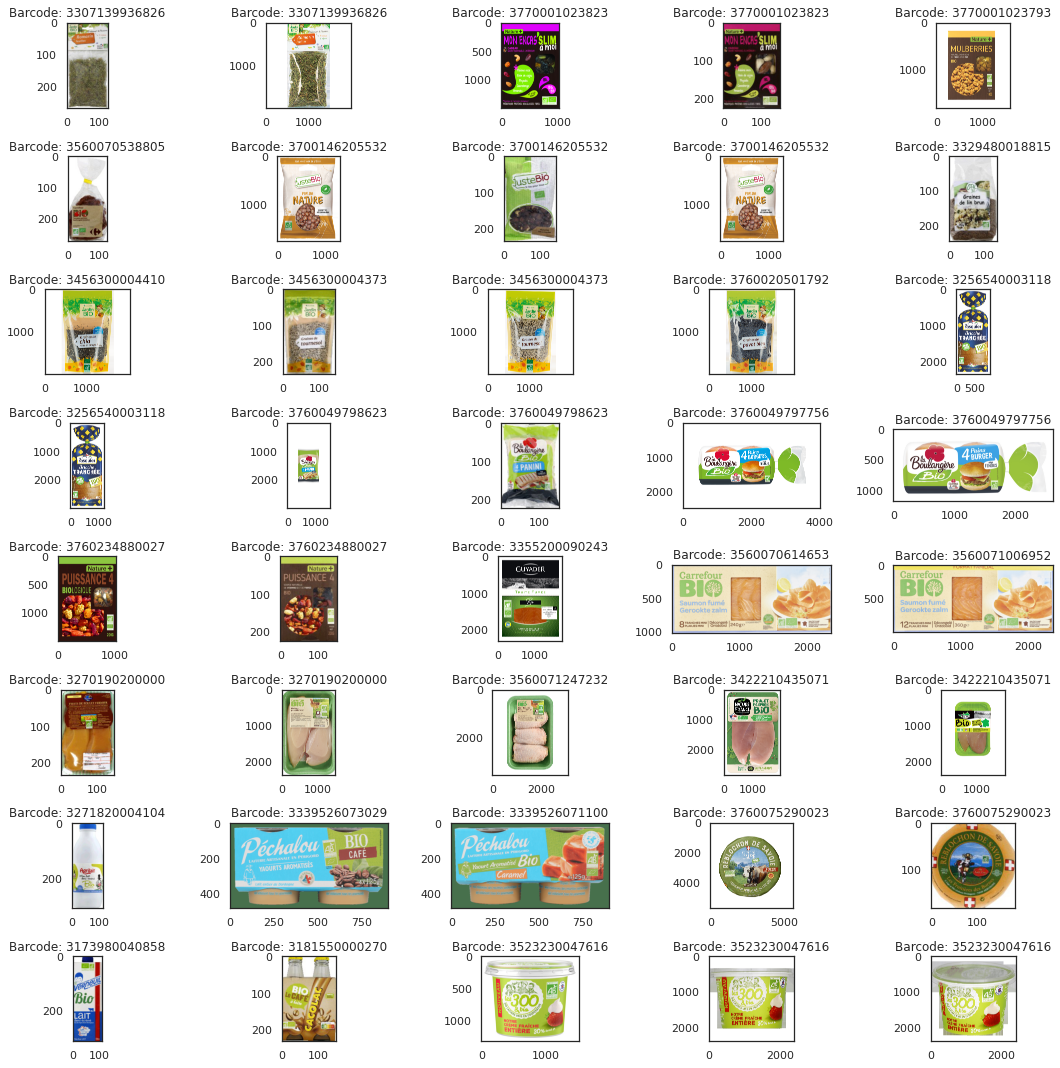

In [11]:
show_images_for(df, bucket)

As we can see, the images do not have the same size. They are also of very high quality, which may not be the case for the test images. The background has also been deleted. Background segmentation and keeping only the product is itself a difficult task. But, it is necessary if we want to deploy this algorithm for a real use-case scénario. We will look into it if we have more time.  

### Dumping the front views

Let's now dump the front views on the VM so we can access them later to train our model.
First, we need to clean the dataframe above.

In [19]:
# We've seen some products contain multiple primary links
# this will remove skewed rows and null values
# to construct a clean dataframe
to_keep = ['img_loc', 'nodeid3', 'level3']
data = df.drop_duplicates(['barcode', 'img_loc'], keep=False)[to_keep]
data = data.dropna()

data = data.rename(columns={"img_loc":"filename", "nodeid3":"label", 'level3': 'level'})

print(data.shape)
data.head()

(40677, 3)


,filename,label,level
0,gs://datacamp-images/images/image_330713993682...,28538,Herbes aromatiques et Epices
1,gs://datacamp-images/images/image_330713993682...,28538,Herbes aromatiques et Epices
2,gs://datacamp-images/images/image_377000102382...,1909,Pruneaux et Fruits séchés
3,gs://datacamp-images/images/image_377000102382...,1909,Pruneaux et Fruits séchés
4,gs://datacamp-images/images/image_377000102379...,28543,Fruits secs mélanges et graines


In [ ]:
# folder = 'images'
# os.mkdir(folder)

In [16]:
# filenames = data["filename"].str.replace("gs://datacamp-images/", folder)
# filenames = list(filenames)

In [17]:
## dumping with original size

# for i, filename in enumerate(filenames):
#     blob = bucket.get_blob(filename)
#     image = cv2.imdecode(np.asarray(bytearray(blob.download_as_string()), dtype="uint8"), cv2.IMREAD_UNCHANGED)
#     if image is not None:
#         cv2.imwrite(filename, image)
#     if i%1000==0:
#         print(i)

In [ ]:
# folder = 'images-299'
# os.mkdir(folder)

Here we dump the images resized to **(299, 299, 3)**. The this the shape we'll use for training. 

In [16]:
# filenames = data["filename"].str.replace("gs://datacamp-images/", folder)
# filenames = list(filenames)

In [ ]:
## dumping with 299x299 size

# for i, filename in enumerate(filenames):
#     blob = bucket.get_blob(filename)
#     image = cv2.imdecode(np.asarray(bytearray(blob.download_as_string()), dtype="uint8"), cv2.IMREAD_UNCHANGED)
#     if image is not None:
#     resized_img = cv2.resize(img, (299, 299))
#         cv2.imwrite(filename, image)
#     if i%1000==0:
#         print(i)